In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

<AxesSubplot:xlabel='Year', ylabel='Paper'>

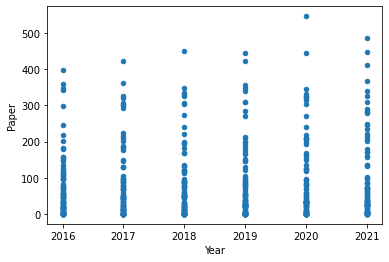

In [2]:
df = pd.read_csv("materials_used.csv")
df['Year'] = pd.to_numeric(df['Financial Year'].str[:4])
df.plot.scatter(x='Year', y='Paper')

In [3]:
df.corr()['Year']

Glass                     -0.008457
Metal                      0.160038
Paper                      0.074230
Plastic                    0.160492
Compost                    0.086750
Electrical Goods           0.081316
Construction Demolition    0.061451
Textiles                   0.073112
Wood                       0.148745
Other                      0.112150
Year                       1.000000
Name: Year, dtype: float64

In [4]:
df_grouped = df.groupby(['Year']).sum().reset_index()

<AxesSubplot:xlabel='Year', ylabel='Paper'>

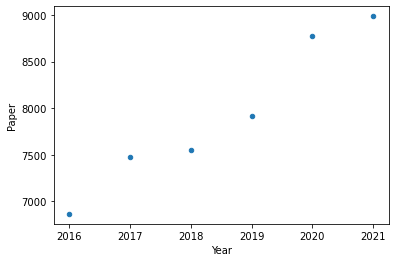

In [5]:
df_grouped.plot.scatter(x='Year', y='Paper')

In [6]:
df_grouped.corr()['Year']

Year                       1.000000
Glass                     -0.230213
Metal                      0.974727
Paper                      0.977015
Plastic                    0.954049
Compost                    0.938110
Electrical Goods           0.807026
Construction Demolition    0.986517
Textiles                   0.832515
Wood                       0.989763
Other                      0.907766
Name: Year, dtype: float64

(6, 1)
(6, 1)
[[9415.429]]


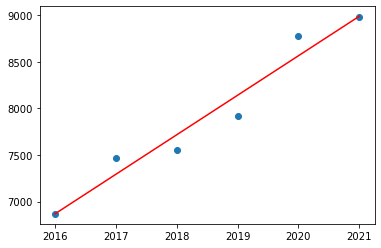

In [12]:
X = df_grouped['Year'].values.reshape(-1, 1)
Y = df_grouped['Paper'].values.reshape(-1, 1)
print(X.shape)
print(Y.shape)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
future_pred = linear_regressor.predict([[2022]])
print(future_pred)

y_predict = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, y_predict, color='red')
plt.show()

In [9]:
def plot_material(df, material, area=None):
    if area != None:
        df = df.loc[df['Area Code'] == area]
    df = df.groupby(['Year'])[material].sum().reset_index(name =material)
    
    X = df['Year'].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = df[material].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    
    X_pred = np.append(X, [[2022]]).reshape(-1, 1)
    Y_pred = linear_regressor.predict(X_pred)  # make predictions
    future_pred = linear_regressor.predict([[2022]])  # make predictions
    
    print("\t\t", df.corr()['Year'][material])
    print("\t\t\t", future_pred)
    
    plt.scatter(X, Y)
    print(Y_pred)
    plt.plot(X_pred, Y_pred, color='red')
    plt.show()

In [10]:
#what are two other factors you would want to consider other than correlation in trying to make predictions about future needs of each material?
##which locations are growing/underperforming
##what new products are going to be added or discontinued
##total output of each area
##efficiency of each area

Glass
		 -0.23021269220068613
			 [[4542.87366667]]
[[4735.56109524]
 [4703.44652381]
 [4671.33195238]
 [4639.21738095]
 [4607.10280952]
 [4574.9882381 ]
 [4542.87366667]]


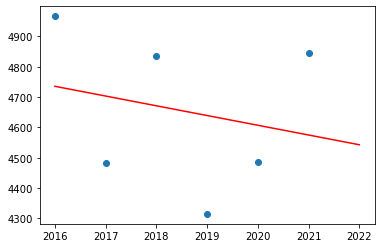

Metal
		 0.974726566935229
			 [[13180.87533333]]
[[ 7049.00047619]
 [ 8070.97961905]
 [ 9092.9587619 ]
 [10114.93790476]
 [11136.91704762]
 [12158.89619048]
 [13180.87533333]]


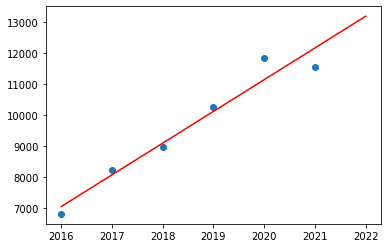

Paper
		 0.9770151202094572
			 [[9415.429]]
[[6867.26671429]
 [7291.96042857]
 [7716.65414286]
 [8141.34785714]
 [8566.04157143]
 [8990.73528571]
 [9415.429     ]]


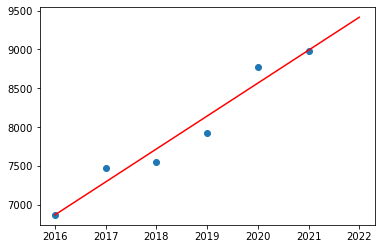

Plastic
		 0.9540493692089288
			 [[4770.60893333]]
[[1881.33704762]
 [2362.8823619 ]
 [2844.42767619]
 [3325.97299048]
 [3807.51830476]
 [4289.06361905]
 [4770.60893333]]


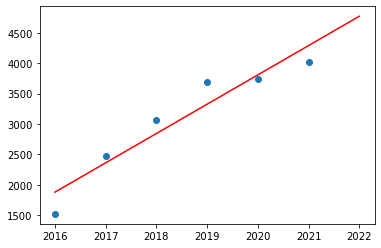

Compost
		 0.938110387942294
			 [[69518.43433333]]
[[51241.78890476]
 [54287.89647619]
 [57334.00404762]
 [60380.11161905]
 [63426.21919048]
 [66472.32676191]
 [69518.43433333]]


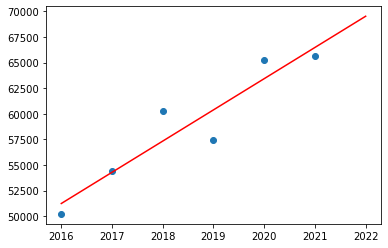

Electrical Goods
		 0.8070261832634471
			 [[15392.39173333]]
[[11478.39304762]
 [12130.7261619 ]
 [12783.05927619]
 [13435.39239048]
 [14087.72550476]
 [14740.05861905]
 [15392.39173333]]


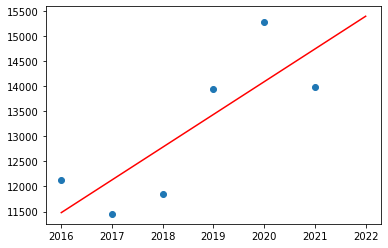

Construction Demolition
		 0.9865168517077467
			 [[39295.1602]]
[[24886.26785714]
 [27287.74991429]
 [29689.23197143]
 [32090.71402857]
 [34492.19608571]
 [36893.67814286]
 [39295.1602    ]]


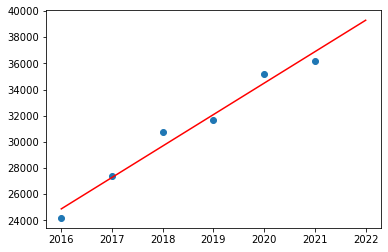

Textiles
		 0.832515061628999
			 [[2554.44846667]]
[[1284.06538095]
 [1495.79589524]
 [1707.52640952]
 [1919.25692381]
 [2130.9874381 ]
 [2342.71795238]
 [2554.44846667]]


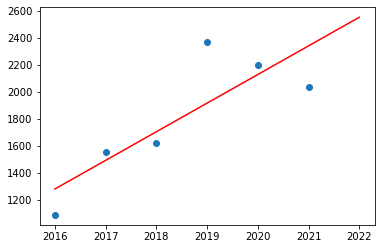

Wood
		 0.9897633928833902
			 [[42610.70646667]]
[[21793.10509524]
 [25262.70532381]
 [28732.30555238]
 [32201.90578095]
 [35671.50600952]
 [39141.1062381 ]
 [42610.70646667]]


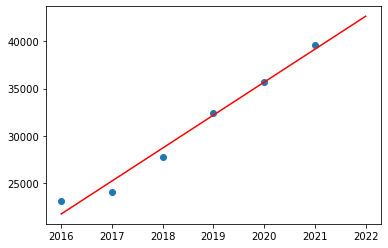

Other
		 0.9077656717786312
			 [[6036.46906667]]
[[3120.49409524]
 [3606.48992381]
 [4092.48575238]
 [4578.48158095]
 [5064.47740952]
 [5550.4732381 ]
 [6036.46906667]]


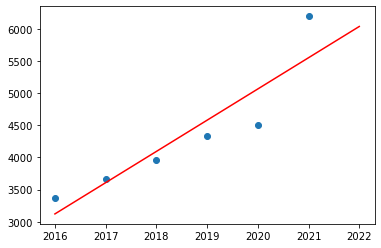

In [11]:
for column in df.columns:
    dtype = df[column].dtype
    if dtype == 'float64':
        print(column)
        plot_material(df, column)

In [ ]:
for column in df.columns:
    dtype = df[column].dtype
    if dtype == 'float64':
        print(column)
        for area in df['Area Code'].unique():
            print("\t", area)
            plot_material(df, column, area)